- 日本株のデータを観察
- Yahoo Finance APIから株価データを取得

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import pickle
import time
from tqdm import tqdm

%matplotlib inline

## 上場銘柄一覧のデータ

In [2]:
# 東証証券取引所に上場している全銘柄の株価データを取得
# 引用元: https://www.jpx.co.jp/markets/statistics-equities/misc/01.html

data_j = pd.read_excel('../../data/jpstock/data_j.xls')
print(data_j.shape)
data_j.head()

(4086, 10)


,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20210129,1301,極洋,市場第一部（内国株）,50,水産・農林業,1,食品,7,TOPIX Small 2
1,20210129,1305,ダイワ上場投信－トピックス,ETF・ETN,-,-,-,-,-,-
2,20210129,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-,-,-,-,-
3,20210129,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-,-,-,-,-
4,20210129,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-,-,-,-,-


In [3]:
data_j.dtypes

日付          int64
コード         int64
銘柄名        object
市場・商品区分    object
33業種コード    object
33業種区分     object
17業種コード    object
17業種区分     object
規模コード      object
規模区分       object
dtype: object

In [4]:
data_j.nunique()

日付            1
コード        4086
銘柄名        4085
市場・商品区分      13
33業種コード      34
33業種区分       34
17業種コード      18
17業種区分       18
規模コード         6
規模区分          6
dtype: int64

In [5]:
# 市場区分
print(data_j['市場・商品区分'].unique())

['市場第一部（内国株）' 'ETF・ETN' 'JASDAQ(スタンダード・内国株）' 'JASDAQ(グロース・内国株）'
 'マザーズ（内国株）' 'PRO Market' '市場第二部（内国株）' '市場第一部（外国株）'
 'REIT・ベンチャーファンド・カントリーファンド・インフラファンド' 'JASDAQ(スタンダード・外国株）' 'マザーズ（外国株）'
 '出資証券' '市場第二部（外国株）']


In [6]:
# 市場･商品区分に属する銘柄の数
data = data_j.groupby(['市場・商品区分']).agg(['count'])['コード']
data.columns = ['銘柄数']
data = data.sort_values('銘柄数', ascending=False)
data

,銘柄数
市場・商品区分,
市場第一部（内国株）,2191
JASDAQ(スタンダード・内国株）,665
市場第二部（内国株）,473
マザーズ（内国株）,343
ETF・ETN,261
REIT・ベンチャーファンド・カントリーファンド・インフラファンド,69
PRO Market,41
JASDAQ(グロース・内国株）,37
出資証券,2


In [ ]:
# matplotlibと戯れる

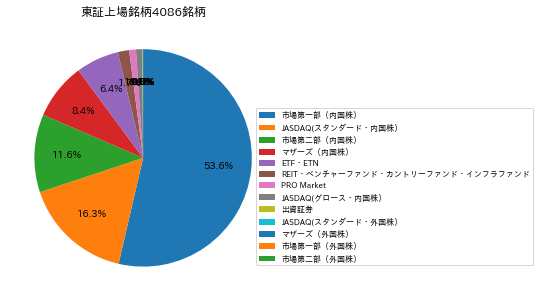

In [7]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
plt.pie(data['銘柄数'],
        #labels=data.index,
        counterclock=False,
        startangle=90,
        autopct="%1.1f%%",
        pctdistance=.7,
       )
plt.legend(data.index,
           #loc = 'lower right',
           fontsize=8,
           bbox_to_anchor=(0.9, 0.7),
          )
plt.title('東証上場銘柄4086銘柄')
plt.show()

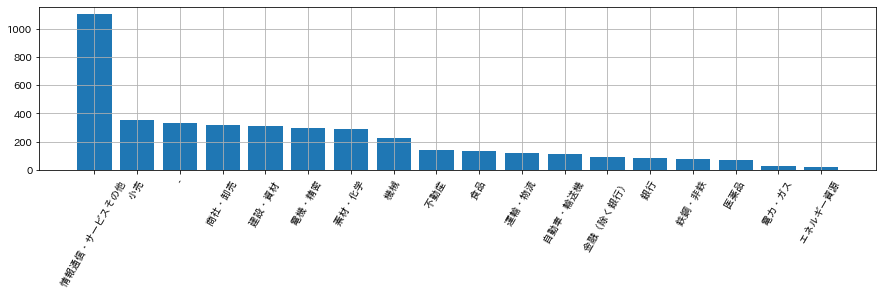

In [8]:
# 各業種に属する銘柄数(17業種区分)
data = data_j.groupby(['17業種区分']).agg(['count'])['コード']
data.columns = ['銘柄数']
# data
# 描画
data = data.sort_values('銘柄数', ascending=False)
plt.figure(figsize=(15,3))
plt.bar(data.index, data['銘柄数'])
plt.xticks(rotation=60)
plt.grid()
plt.show()

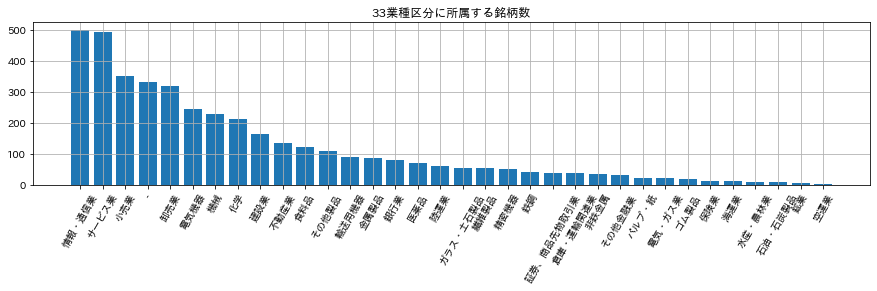

In [9]:
# 各業種に属する銘柄数(33業種区分)
data = data_j.groupby(['33業種区分']).agg(['count'])['コード']
data.columns = ['銘柄数']
# data

# 描画
data = data.sort_values('銘柄数', ascending=False)
plt.figure(figsize=(15,3))
plt.bar(data.index, data['銘柄数'])
plt.xticks(rotation=60)
plt.grid()
plt.title('33業種区分に所属する銘柄数')
plt.show()

## Yahoo Financeから日次株価データをとってくる 

In [10]:
codes = list(data_j['コード'])
codes = list(map(lambda x: str(x)+'.T', codes))
len(codes)

4086

In [11]:


start = '2013-01-01'
end = '2021-03-01'

ochlv_dict = {}
for code in tqdm(codes[:]):
    try:
        ochlv_dict[int(code[:4])] = web.DataReader(code, "yahoo", start, end)
        #time.sleep(1)
    except:
        continue

# 保存
with open('../../data/jpstock/ochlv_jpstock_all_20130101-20210301.pickle', 'wb') as fp:
    pickle.dump(ochlv_dict, fp)

100%|██████████| 4086/4086 [3:02:23<00:00,  2.68s/it]  


In [13]:
len(ochlv_dict.keys())

4061

## リターンデータの調査

- 年間上昇率ランキングとか作ってみる
- テクニカルとかファンダメンタルズとか合わせて分析出来たらおもろいと思う
- 特にファンダ
- 有報の自然言語処理とかにも興味がある今日この頃

In [15]:
# 東証上場銘柄の基礎情報
data_j = pd.read_excel('../../data/jpstock/data_j.xls')

# 東証全銘柄の価格データ
ochlv_dict = pd.read_pickle('../../data/jpstock/ochlv_jpstock_all_20130101-20210301.pickle')

In [16]:
markets = [
    '市場第一部（内国株）',
    'JASDAQ(スタンダード・内国株）',
    '市場第二部（内国株）',
    'マザーズ（内国株）', 
    'JASDAQ(グロース・内国株）',
    #'ETF・ETN ',
    #'REIT・ベンチャーファンド・カントリーファンド・インフラファンド',
    #'PRO Market',
    #'出資証券',
    #'JASDAQ(スタンダード・外国株）',
    #'マザーズ（外国株）',
    #'市場第一部（外国株）',
    #'市場第二部（外国株）',
]

In [17]:
# key: 2016〜2020 (int)
# value: 各銘柄の上昇率などの辞書

years = ['2016', '2017', '2018', '2019', '2020']
change_rate_dict = {}
for y in tqdm(years[:]):
    each_year_dict = {}
    for k,v in ochlv_dict.items():
        try:
            # 高値を付けた日は安値を付けた日の後でなくてはならない
            if not v[y]['High'].idxmax() > v[y]['Low'].idxmin():
                continue
            # TODO
            # 終値以外分割調整に対応してない
            # CloseとAdj Closeから分割調整比率を計算して，
            # High, Low, Openを更新する必要があると思いました。
            idx = data_j[data_j['コード']==k].index[0]
            each_year_dict[k] = {
                    'name': data_j[data_j['コード']==k]['銘柄名'][idx],
                    'market': data_j[data_j['コード']==k]['市場・商品区分'][idx],
                    '17group': data_j[data_j['コード']==k]['17業種区分'][idx],
                    '33group': data_j[data_j['コード']==k]['33業種区分'][idx],
                    'highest_price': v[y]['High'].max(),
                    'lowest_price' : v[y]['Low'].min(),
                    'highest_date' : v[y]['High'].idxmax(),
                    'lowest_date'  : v[y]['Low'].idxmin(),
                    'change_rate'  : v[y]['High'].max()/v[y]['Low'].min()-1,
                }
        except:
            continue
    change_rate_dict[int(y)] = each_year_dict

100%|██████████| 5/5 [01:50<00:00, 22.16s/it]


In [18]:
# データフレームに変換
# 上昇率を降順にソートして年間上勝率のランキングを作成
df_dict = {}
for y in years[:]:
    df_dict[int(y)] = pd.DataFrame(
        change_rate_dict[int(y)].values(),
        index=change_rate_dict[int(y)].keys()).\
        sort_values('change_rate', ascending=False)

In [20]:
y = 2020

df = df_dict[y]
df = pd.concat([ df.query(' market==@tm ') for tm in markets])
# TODO:異常値の除外 .. 突然100倍になるデータがちらほら，↓は応急処置
df = df[df['change_rate']<100].sort_values('change_rate', ascending=False)
#print(df_2020.shape)

In [22]:
# 確認
# 年間上昇率TOP10
# 他のサイトのデータとも一致してた！

df.head(10)

,name,market,17group,33group,highest_price,lowest_price,highest_date,lowest_date,change_rate
2191,テラ,JASDAQ(スタンダード・内国株）,情報通信・サービスその他,サービス業,2175.0,92.00,2020-06-09,2020-03-13,22.641304
4477,ＢＡＳＥ,マザーズ（内国株）,情報通信・サービスその他,情報・通信業,17240.0,774.00,2020-10-08,2020-03-13,21.273902
5337,ダントーホールディングス,市場第一部（内国株）,建設・資材,ガラス・土石製品,1065.0,58.00,2020-10-07,2020-03-13,17.362069
5212,不二硝子,JASDAQ(スタンダード・内国株）,建設・資材,ガラス・土石製品,4100.0,330.00,2020-11-18,2020-03-13,11.424242
2150,ケアネット,マザーズ（内国株）,情報通信・サービスその他,サービス業,6420.0,537.00,2020-12-02,2020-03-19,10.955307
3683,サイバーリンクス,市場第一部（内国株）,情報通信・サービスその他,情報・通信業,3925.0,334.00,2020-12-02,2020-03-13,10.751497
8256,プロルート丸光,JASDAQ(スタンダード・内国株）,商社・卸売,卸売業,538.0,47.00,2020-06-09,2020-04-07,10.446809
6400,不二精機,JASDAQ(スタンダード・内国株）,機械,機械,1670.0,150.00,2020-12-14,2020-03-13,10.133333
3962,チェンジ,市場第一部（内国株）,情報通信・サービスその他,情報・通信業,6390.0,585.25,2020-09-28,2020-04-03,9.918411
4308,Ｊストリーム,マザーズ（内国株）,情報通信・サービスその他,情報・通信業,6840.0,638.00,2020-12-03,2020-03-13,9.721003
